In [1]:
import pandas as pd 

from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
# loed dataset 
dataset = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# drop unimportant columns
dataset2=dataset.drop(['area_type','availability','society','balcony'], axis='columns')
dataset2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
dataset2.shape

(13320, 5)

In [6]:
dataset2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
dataset2= dataset2.dropna()
dataset2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
dataset2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
dataset2['Bhk']=dataset2['size'].apply(lambda x: int(x.split(' ')[0]))
dataset2.head()
                                       

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [11]:
dataset2[~dataset2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,Bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [12]:
def conert_range_to_average(x):
    tokens= x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [13]:
dataset3=dataset2.copy()
dataset3['total_sqft']=dataset3['total_sqft'].apply(conert_range_to_average)
dataset3.head()

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [14]:
dataset3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
Bhk                   4
Name: 30, dtype: object

In [15]:
dataset3['total_sqft'].isna().sum()

46

In [16]:
dataset3.shape

(13246, 6)

In [17]:
dataset3.dropna(inplace=True)
dataset3.shape

(13200, 6)

In [18]:
dataset4=dataset3.copy()
dataset4['price_per_sqft']= dataset4['price']*100000/dataset4['total_sqft']
dataset4.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
dataset4.location=dataset4.location.apply(lambda x: x.strip())
location_stats= dataset4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [20]:
len(location_stats[location_stats<=10])

1047

In [21]:
location_stats_less_10=location_stats[location_stats<=10]

In [22]:
location_stats_less_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [23]:
dataset4.location=dataset4.location.apply(lambda x: 'other' if x in location_stats_less_10 else x )

In [24]:
len(dataset4.location.unique())

241

In [25]:
dataset4.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
dataset4[dataset4.total_sqft/dataset4.Bhk <300]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [27]:
dataset5=dataset4[~(dataset4.total_sqft/dataset4.Bhk <300)]
dataset5.shape

(12456, 7)

In [28]:
import numpy as np
def remove_perice_per_sqft_outlier (df):
    df_out=pd.DataFrame()
    for key,subdf in dataset5.groupby('location'):
        mean=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft >(mean-sd)) & (subdf.price_per_sqft <= (mean+sd))]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

dataset6=remove_perice_per_sqft_outlier(dataset5)
dataset6.shape

(10242, 7)

In [29]:
len(dataset6.location.unique())


241

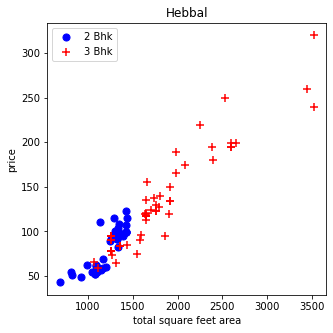

In [30]:

def vasiulaizing(df,l):
    N2=df[(df.location == l) & (df.Bhk==2) ]
    N3=df[(df.location==l) & (df.Bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(5,5)
    plt.scatter(N2.total_sqft,N2.price,color='blue',label='2 Bhk', s=50 )
    plt.scatter(N3.total_sqft,N3.price,marker="+" , color='red',label="3 Bhk" ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(l)
    plt.legend()
    
vasiulaizing(dataset6,"Hebbal")

In [31]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('Bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('Bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(exclude_indices ,axis='index')

dataset7= remove_bhk_outliers(dataset6)
dataset7.shape

(7317, 7)

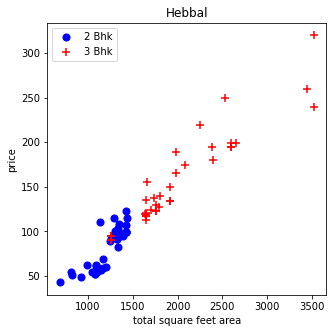

In [32]:
def vasiulaizing(df,l):
    N2=df[(df.location == l) & (df.Bhk==2) ]
    N3=df[(df.location==l) & (df.Bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(5,5)
    plt.scatter(N2.total_sqft,N2.price,color='blue',label='2 Bhk', s=50 )
    plt.scatter(N3.total_sqft,N3.price,marker="+" , color='red',label="3 Bhk" ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(l)
    plt.legend()
    
vasiulaizing(dataset7,"Hebbal")

Text(0, 0.5, 'count')

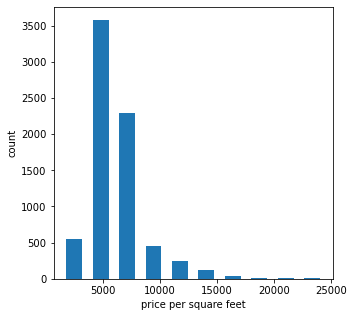

In [33]:
#import matplotlib
#matplotlib.rcParams['figure.figsize']= (20,10)
plt.hist(dataset7.price_per_sqft,rwidth = 0.6)
plt.xlabel("price per square feet")
plt.ylabel("count")



In [34]:
dataset7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [35]:
dataset7[dataset7.bath>10]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

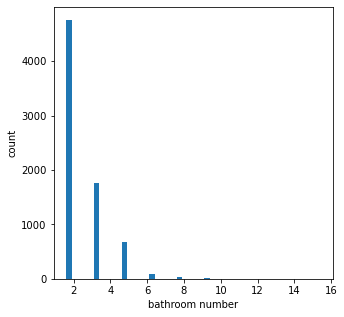

In [36]:
plt.hist(dataset7.bath, rwidth=0.2)
plt.xlabel("bathroom number")
plt.ylabel("count")

In [37]:
dataset7[dataset7.bath > (dataset7.Bhk+2)].shape
# dataset7.shape


(4, 7)

In [38]:
dataset7.shape

(7317, 7)

In [39]:
dataset8 =dataset7[dataset7.bath < dataset7.Bhk+2]
dataset8.shape

(7239, 7)

In [40]:
dataset9=dataset8.drop(['size','price_per_sqft'], axis='columns')
dataset9.head(1)

,location,total_sqft,bath,price,Bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4


In [49]:
len(dataset9.location.unique())

241

In [53]:
dummies= pd.get_dummies(dataset9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dataset10 = pd.concat([dataset9.drop('location',axis='columns'),dummies.drop('other' ,axis ='columns')], axis='columns' )
dataset10.head()

,total_sqft,bath,price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dataset10.shape

(7239, 244)

In [56]:
# input independent variable
x=dataset10.drop('price', axis='columns')
x.head(3)

,total_sqft,bath,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# output dependent variable
y= dataset10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10 )

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8629132245229443

In [73]:
# using cross validition to increase accurcy
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv= ShuffleSplit(n_splits= 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)


array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [60]:
# predict using SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.6699613938761007

In [74]:
# predict using dicision tree 
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.7041222906354684

In [75]:
x.columns


Index(['total_sqft', 'bath', 'Bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [91]:
np.where(x.columns=='1st Block Jayanagar')[0][0]

3

In [92]:
def predict_price (location ,sqft , bath ,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    nc=np.zeros(len(x.columns))
    nc[0]= sqft
    nc[1]= bath
    nc[2]= bhk
    if loc_index >=0:
        nc[loc_index]=1
    
    return lr_clf.predict([nc])[0]

In [95]:
predict_price('1st Phase JP Nagar', 1000,2,2)

83.86570258312122

In [96]:
predict_price('1st Phase JP Nagar', 1000,3,3)

86.08062284986892

In [100]:
import pickle
with open ('linear_regrision_model_to_prdict_price.pickle','wb') as f:
    pickle.dump(lr_clf,f)

with open ('dataset_aftre_clean.csv','wb') as f:
    pickle.dump(dataset10,f)


In [101]:
import json
columns= {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))
    